# The $\chi^2$ distribution

We generate a set of random variables made as the sum of $\nu$ squared normal random numbers. The ``plotNormal`` function generates ``n`` normally distributed random variables. They are elevated to the $d^{th}$ power and summed. Finally, it plots the distribution of the result. The distributions are normalised such that they have the same integral. On top of the experimental distribution, the predicted distributions are shown (they depend on $d$).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import stats

def plotNormal(n, d, leg, plot):
    ran = []
    x = np.arange(-20*n, 20*n, 0.1)
    for i in range(10000):
        ran.append(np.array(np.sum(np.random.normal(0., 1., n)**d)))
    freq, bins, ni = plot.hist(ran, range(-20*n,20*n), histtype='step', label=leg)
    integral = np.sum(freq)
    if d == 1:
        plot.plot(x,stats.norm.pdf(x, 0., np.sqrt(n))*integral, '-', label=leg)
    if d == 2:
        plot.plot(x,stats.chi2.pdf(x, n)*integral, '-', label=leg)
    return plot

We prepare a figure containing two plots: the ``add_subplot()`` method tells Python to divide the figure into $n\times m$ plots and returns the one corresponding to its last argument. For example: ``add_subplot(n, m, i)`` returns the ``i``-th plot object for a figure in which there are ``n`` times ``m`` plots.

On each plot we draw the distributions of the sum of $\nu$ normally distributed random variables as well as their square. The latter follow a distribution known as the $\chi^2$ distribution.

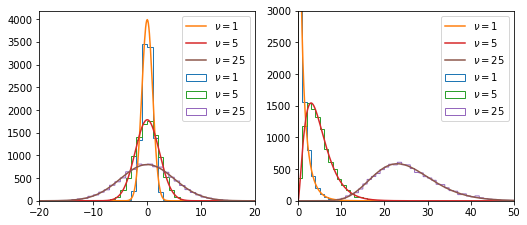

In [5]:
fig = plt.figure(figsize = (8.5, 3.5))
gaussians = fig.add_subplot(1,2,1)
chi2distr = fig.add_subplot(1,2,2)
gaussians = plotNormal(1, 1, '$\\nu=1$', gaussians)
gaussians = plotNormal(5, 1, '$\\nu=5$', gaussians)
gaussians = plotNormal(25, 1, '$\\nu=25$', gaussians)
gaussians.set_xlim(-20,20)
gaussians.legend(loc='upper right', shadow=False, fontsize='medium')

chi2distr = plotNormal(1, 2, '$\\nu=1$', chi2distr)
chi2distr = plotNormal(5, 2, '$\\nu=5$', chi2distr)
chi2distr = plotNormal(25, 2, '$\\nu=25$', chi2distr)
chi2distr.set_xlim(0,50)
chi2distr.set_ylim(0,3000)
chi2distr.legend(loc='upper right', shadow=False, fontsize='medium')
plt.savefig('../../figures/incline-gaussians.png')
plt.show()

In the final plot we show the $\chi^2$ distribution with $\nu=100$. It is the distribution of the sum of 100 squared normally distributed random variables. Because of the law of large numbers, the final distribution resembles closely a gaussian distribution.

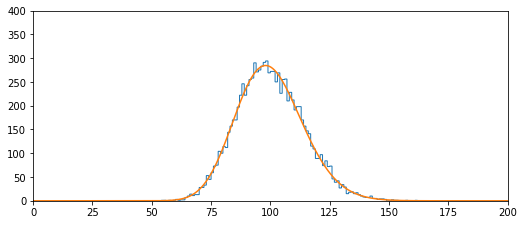

In [6]:
plt.figure(figsize = (8.5, 3.5))
plt = plotNormal(100, 2, '$\\nu=100$', plt)
plt.xlim(0,200)
plt.ylim(0,400)
plt.savefig('../../figures/incline-chi2100.png')
plt.show()